<a href="https://colab.research.google.com/github/LhsEric/titanic-analysis/blob/main/Task_03%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C%EF%BC%882%EF%BC%89_%E5%BB%BA%E7%AB%8B%E7%AC%AC%E4%B8%80%E5%80%8B_Baseline_%E7%89%88%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#專題實作 #01：鐵達尼號存活預測

##環境準備

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

url = "https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv"
df = pd.read_csv(url)
df = pd.DataFrame(df)
print(df.head(20))
print("========================================================")
print(df.info())

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   
15           16         1       2   
16           17         0       3   
17           18         1       2   
18           19         0       3   
19           20         1       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.

*  請根據 Kaggle 文件瞭解 Titanic 資料中所有欄位的定義為何？

*  進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關
係（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

*  承上題，請問你是如何定義與解讀什麼稱為「關係大」呢？

* Survial: 0=No, 1=Yes
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
* sex: male, female
* Age: age
* sibsp: 同行兄弟姐妹/配偶人數
* parch: 同行父母/子女人數
* Ticket: Ticket No.
* fare: 船票價格
* cabin: cabin No.
* Embarked: C = Cherbourg, Q = Queenstown, S = Southampton





In [2]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64


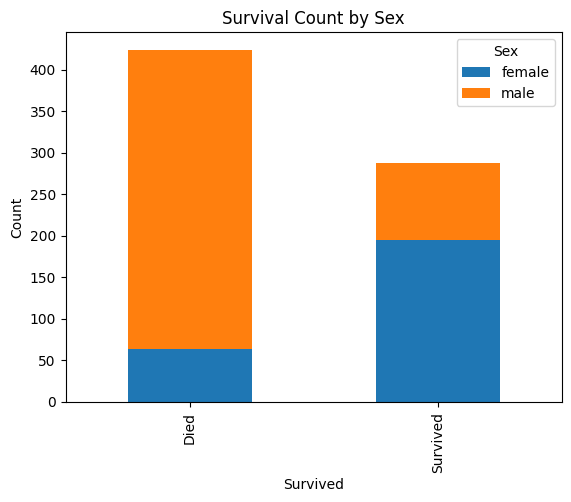

In [3]:
# 進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關 係（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）
# Data Cleaning (Age dropna)
df = df.dropna(subset=['Age'])
df = df.dropna(subset=['Embarked'])
print(df.isnull().sum())

# 去掉不需要的特徵
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# 女性生存機率大於男性,男性相對女性死亡率又更高
groupbysurvial_sex = df.groupby(['Survived','Sex']).size().unstack() #Survial: 0=No, 1=Yes
groupbysurvial_sex_plt = groupbysurvial_sex.plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
groupbysurvial_sex_plt.set_xticklabels(['Died', 'Survived'])
plt.show()

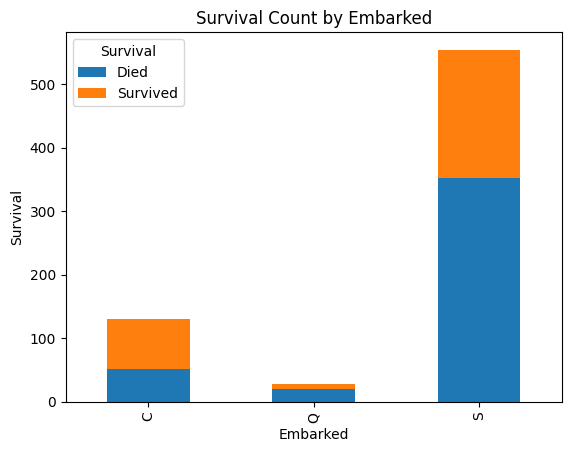

In [4]:
# C = Cherbourg, Q = Queenstown, S = Southampton
# 來自Southampton的人數最多,其次Cherbourg,最後是Queenstown
# Embarked與死亡率想關係可能不大
groupbysurvial_Embarked = df.groupby(['Embarked','Survived']).size().unstack()
groupbysurvial_Embarked_plt = groupbysurvial_Embarked.plot(kind='bar', stacked=True)
plt.title('Survival Count by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival')
plt.legend(title='Survival', labels=['Died', 'Survived'])
plt.show()

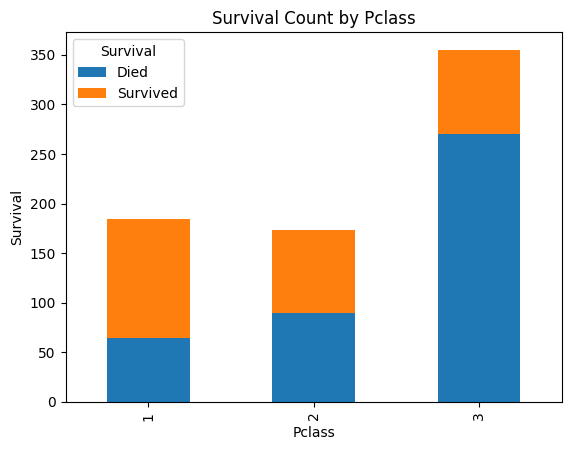

In [5]:
# pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
# 「1st class」 存活率比 「2nd及3rd class」 存活率高
groupbysurvial_Ticket = df.groupby(['Pclass','Survived']).size().unstack()
groupbysurvial_Ticket_plt = groupbysurvial_Ticket.plot(kind='bar', stacked=True)
plt.title('Survival Count by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival')
plt.legend(title='Survival', labels=['Died', 'Survived'])
plt.show()

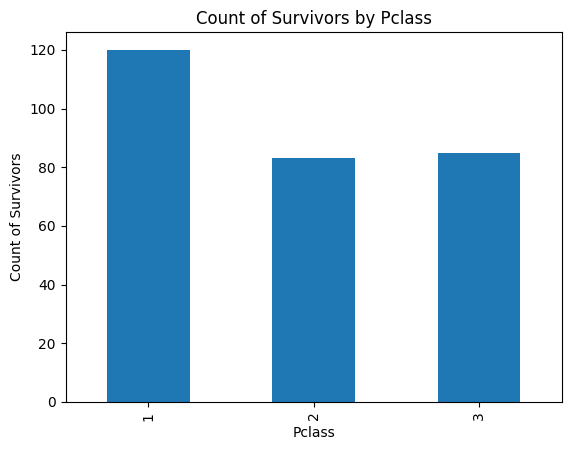

In [6]:
# 「1st class」 存活率比 「2nd及3rd class」 存活率高
# 篩選出只包含生還者（Survived == 1）的資料
survived_df = df[df['Survived'] == 1]

# 根據 Pclass 分組並計算每組的大小
groupbysurvival_Ticket = survived_df.groupby(['Pclass']).size()

# 繪製柱狀圖
groupbysurvival_Ticket_plt = groupbysurvival_Ticket.plot(kind='bar')
plt.title('Count of Survivors by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count of Survivors')
plt.show()

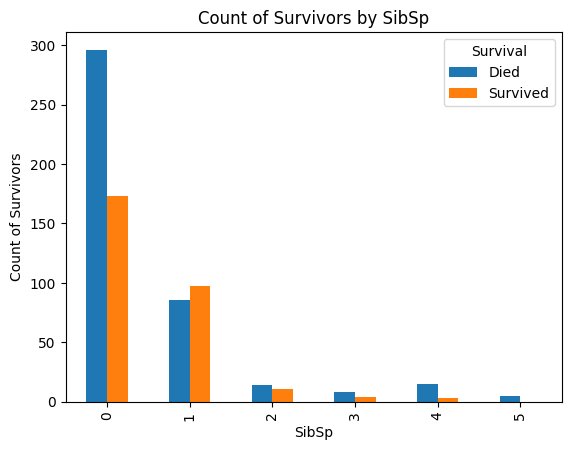

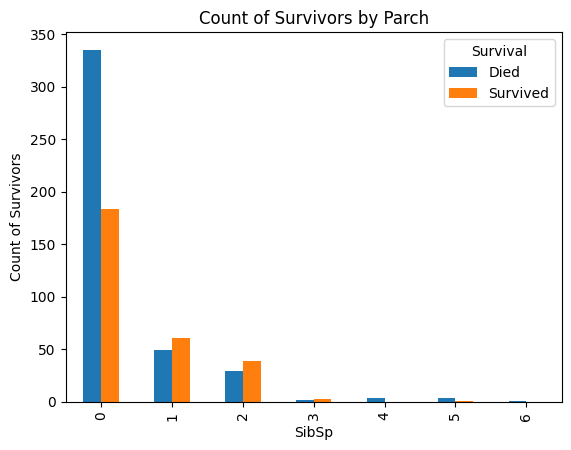

In [7]:
# 家人越多越難獲救

# sibsp: 同行兄弟姐妹/配偶人數
groupbysurvival_sibsp = df.groupby(['SibSp','Survived']).size().unstack()

# 繪製柱狀圖
groupbysurvival_sibsp_plt = groupbysurvival_sibsp.plot(kind='bar')
plt.title('Count of Survivors by SibSp')
plt.xlabel('SibSp')
plt.ylabel('Count of Survivors')
plt.legend(title='Survival', labels=['Died', 'Survived'])
plt.show()

# parch: 同行父母/子女人數

groupbysurvival_parch = df.groupby(['Parch','Survived']).size().unstack()

# 繪製柱狀圖
groupbysurvival_parch_plt = groupbysurvival_parch.plot(kind='bar')
plt.title('Count of Survivors by Parch')
plt.xlabel('SibSp')
plt.ylabel('Count of Survivors')
plt.legend(title='Survival', labels=['Died', 'Survived'])
plt.show()

In [8]:
# Data Cleaning
# 用 LabelEncoder 把 Sex 進行標籤編碼法
label1 = LabelEncoder()
df['Sex'] = label1.fit_transform(df['Sex']) # No=0; Yes=1
# 用get_dummies把 Embarked 轉換為虛擬變數
df = pd.get_dummies(df, columns=["Embarked"])


print(df.head(20))
print("========================================================")
print(df.info())

    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  \
0          0       3    1  22.0      1      0   7.2500       False   
1          1       1    0  38.0      1      0  71.2833        True   
2          1       3    0  26.0      0      0   7.9250       False   
3          1       1    0  35.0      1      0  53.1000       False   
4          0       3    1  35.0      0      0   8.0500       False   
6          0       1    1  54.0      0      0  51.8625       False   
7          0       3    1   2.0      3      1  21.0750       False   
8          1       3    0  27.0      0      2  11.1333       False   
9          1       2    0  14.0      1      0  30.0708        True   
10         1       3    0   4.0      1      1  16.7000       False   
11         1       1    0  58.0      0      0  26.5500       False   
12         0       3    1  20.0      0      0   8.0500       False   
13         0       3    1  39.0      1      5  31.2750       False   
14         0       3

In [12]:
# 建立第一個 Baseline 版本

df_train = df
columns_X = list(set(df_train.columns) - {'Survived'})
columns_y = ['Survived']


train_X = df_train[columns_X]
train_y = df_train[columns_y]


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)


[0.74825175 0.82517483 0.76760563 0.76760563 0.81690141]
